# Projet Auto ML

## Auteurs : 
<font size="3"> ***BENDAOUD Islam***</font> 


# Partie 1 (Data traitement) : 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Fifa 23 Players Data.csv')  
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [3]:
df["BMI"] = df['Weight(in kg)']/((df['Height(in cm)']/100)**2)

In [4]:
df["Nationality"].value_counts()

Nationality
England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: count, Length: 160, dtype: int64

We can instantly identify many columns that are useless and do not inform us on anything, for example : 
 - Known As : same as Full Name
 - Image Link : just a link for an image 
 - National Team Image Link : just a link for an image 
 - We decided to delete the "National Team Name" column and everything associated with it. There are too much undefined values.
 - In the dataset, we have a lot of clubs, almost 700. A one-hot encoding of the associated column is very expensive in computations, and the club in which a player is isn't necessarily an indicator of their price. It can be an indicator of their skills, however.

In [5]:
data = df.drop(['Known As' , 'National Team Image Link' , 'Image Link'] ,axis = 1 )

In [6]:
data = data.drop(['National Team Name','National Team Position' , 'Club Name' ], axis=1)

In the positions played we should only keep the first one as indecated. 

In [7]:
data['Positions Played'] = data['Positions Played'].str.split(',').str[0]

In [8]:
data

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,88,91,67,66,67,62,53,62,22,23.458562
1,Karim Benzema,91,91,64000000,CF,CF,France,34,185,81,...,84,89,67,67,67,63,58,63,21,23.666910
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,83,86,67,69,67,64,63,64,22,23.666910
3,Kevin De Bruyne,91,91,107500000,CM,CM,Belgium,31,181,70,...,91,91,82,82,82,78,72,78,24,21.366869
4,Kylian Mbappé,91,95,190500000,ST,ST,France,23,182,73,...,84,92,70,66,70,66,57,66,21,22.038401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,ST,CAM,Republic of Ireland,21,174,68,...,44,50,41,38,41,40,36,40,15,22.460034
18535,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,...,45,45,47,48,47,49,49,49,15,19.591837
18536,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,49,52,46,44,46,46,42,46,17,22.491349
18537,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,33,33,44,42,44,47,49,47,15,20.515086


### BMI

In [9]:
data['Height(in m)'] = data['Height(in cm)'] / 100

#drop cm since it's 100% linear correlated to the heigh(m)
data.drop('Height(in cm)' , axis=1, inplace=True)
# Calculate BMI
data['BMI'] = data['Weight(in kg)'] / (data['Height(in m)'] ** 2)


**dropping also the weight since it's just the bmi is just a weight over the height , we already have the height so no use for the weight since we can get that information from the BMI and height combined.**


In [10]:
data.drop('Weight(in kg)' , axis=1, inplace=True)


### Changing to simple 4 positions 

In [11]:
def simple_pos(pos):
    if pos in ["RB" , "LB" , "RWB" , "LWB" , "CB"] : 
        return 'DEF'
    elif pos in ["CDM"  , "CAM" ,"RM"  , "LM"  , "CM"] : 
        return "MID"
    elif pos in ["CF" , "ST" , "LW" , "RW" , "LF" , "RF"] : 
        return "ATK"
    elif pos == "GK": 
        return "GK"
    else :
        return "-"

In [12]:
columns_to_change = ["Best Position" , "Positions Played", "Club Position"]

In [13]:
data[columns_to_change] = data[columns_to_change].applymap(simple_pos)

In [14]:
data.columns.values

array(['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Age',
       'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause',
       'Club Position', 'Contract Until', 'Club Jersey Number',
       'Joined On', 'On Loan', 'Preferred Foot', 'Weak Foot Rating',
       'Skill Moves', 'International Reputation',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total',
       'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking

In [15]:
contingency_table = pd.crosstab(data['Best Position'], data['Positions Played'])
contingency_table

Positions Played,ATK,DEF,GK,MID
Best Position,,,,
ATK,2864,9,0,274
DEF,2,5938,0,333
GK,0,0,2061,0
MID,711,302,0,6045


In [16]:
from scipy.stats import chi2_contingency
chi2, _, _, _ = chi2_contingency(contingency_table)
# Calculate Cramer's V
n = data.shape[0]
min_dim = min(contingency_table.shape)
cramer_v = np.sqrt(chi2 / (n * (min_dim - 1)))

print(f"Cramer's V: {cramer_v:.2f}") # 0.90 , to decide for later if we should delete 

Cramer's V: 0.90


Cramer value of 0.9 is super high , Positions played is to be deleted. 

In [17]:
contingency_table2 = pd.crosstab(data['Best Position'], data['Club Position'])
contingency_table2

Club Position,-,ATK,DEF,GK,MID
Best Position,,,,,
ATK,1976,971,10,0,190
DEF,3442,1,2609,0,221
GK,1388,0,0,673,0
MID,4294,342,179,0,2243


In [18]:
chi2, _, _, _ = chi2_contingency(contingency_table2)
# Calculate Cramer's V
n = data.shape[0]
min_dim = min(contingency_table2.shape)
cramer_v = np.sqrt(chi2 / (n * (min_dim - 1)))
print(f"Cramer's V: {cramer_v:.2f}") # 0.53 , to decide for later if we should delete 

Cramer's V: 0.53


In [19]:
data = data.drop(["Positions Played" , "Club Position"] , axis = 1 )

### Dropping the T-shirt number : 
Since the T-shirt segnification has no meaning in football and used just like an id of a player inside a team we can delete this column, also if we don't do that generally speaking 2nd GK has the number 12 or 13, the strikers have 11, this can bais the data since numerically speaking the 2nd GK have less distance than the number 9 striker of the team to the 11 striker. So better delete that column. Also another problem is the same person can have 2 jersey numbers , one of the national team, the other one of the club. Not only that but also by not dropping the number , number 10 would have the same effect on mbappe ( best player of the world ) and someone who has no skills.

In [20]:
data = data.drop(["National Team Jersey Number" , "Club Jersey Number" , 'Contract Until' , 'On Loan'] , axis = 1 )

### Changing the rates from low , medium and high to 1,2,3 

In [21]:
def change_rates(rate ): 
    if rate == "Medium" : 
        return 2
    elif rate == "Low" : 
        return 1
    elif rate == "High" : 
        return 3

In [22]:
columns_to_change = ["Attacking Work Rate" , "Defensive Work Rate"]
data[columns_to_change] = data[columns_to_change].applymap(change_rates)

### Age classes : 
here we will make the age as classes, -20, 20-25 , 25-30 ... as 0,1,2... this is true since the ages are next to one each other so if we make the as classes, this won't change much, since it won't biais the data b supposing the players who are in the class of 20-25 are closer to those on 25-30 than those on 30-35 because it's true.

In [23]:
def change_ages(age) : 
    if age < 20 : 
        return 0 
    elif age >= 20 and age < 25 : 
        return 1 
    if age >= 25 and age < 30 :
        return 2
    elif age >=30 and age <35 : 
        return 3
    else : 
        return 4

In [24]:
columns_to_change = ["Age"]
data[columns_to_change] = data[columns_to_change].applymap(change_ages)

In [25]:
data

,Full Name,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,TotalStats,BaseStats,Wage(in Euro),...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,Height(in m)
0,Lionel Messi,91,91,54000000,MID,Argentina,4,2190,452,195000,...,91,67,66,67,62,53,62,22,23.458562,1.69
1,Karim Benzema,91,91,64000000,ATK,France,3,2147,455,450000,...,89,67,67,67,63,58,63,21,23.666910,1.85
2,Robert Lewandowski,91,91,84000000,ATK,Poland,3,2205,458,420000,...,86,67,69,67,64,63,64,22,23.666910,1.85
3,Kevin De Bruyne,91,91,107500000,MID,Belgium,3,2303,483,350000,...,91,82,82,82,78,72,78,24,21.366869,1.81
4,Kylian Mbappé,91,95,190500000,ATK,France,1,2177,470,230000,...,92,70,66,70,66,57,66,21,22.038401,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,MID,Republic of Ireland,1,1287,274,500,...,50,41,38,41,40,36,40,15,22.460034,1.74
18535,Dejiang Yang,47,57,90000,MID,China PR,0,1289,267,500,...,45,47,48,47,49,49,49,15,19.591837,1.75
18536,Liam Mullan,47,67,130000,MID,Northern Ireland,0,1333,277,500,...,52,46,44,46,46,42,46,17,22.491349,1.70
18537,Daithí McCallion,47,61,100000,DEF,Republic of Ireland,0,1113,226,500,...,33,44,42,44,47,49,47,15,20.515086,1.78


### Encoding positions and preferred foot : 


In [26]:
df_encoded = pd.get_dummies(data, columns=['Best Position', 'Preferred Foot'])

In [27]:
df_encoded

,Full Name,Overall,Potential,Value(in Euro),Nationality,Age,TotalStats,BaseStats,Wage(in Euro),Release Clause,...,RB Rating,GK Rating,BMI,Height(in m),Best Position_ATK,Best Position_DEF,Best Position_GK,Best Position_MID,Preferred Foot_Left,Preferred Foot_Right
0,Lionel Messi,91,91,54000000,Argentina,4,2190,452,195000,99900000,...,62,22,23.458562,1.69,False,False,False,True,True,False
1,Karim Benzema,91,91,64000000,France,3,2147,455,450000,131199999,...,63,21,23.666910,1.85,True,False,False,False,False,True
2,Robert Lewandowski,91,91,84000000,Poland,3,2205,458,420000,172200000,...,64,22,23.666910,1.85,True,False,False,False,False,True
3,Kevin De Bruyne,91,91,107500000,Belgium,3,2303,483,350000,198900000,...,78,24,21.366869,1.81,False,False,False,True,False,True
4,Kylian Mbappé,91,95,190500000,France,1,2177,470,230000,366700000,...,66,21,22.038401,1.82,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,Republic of Ireland,1,1287,274,500,193000,...,40,15,22.460034,1.74,False,False,False,True,False,True
18535,Dejiang Yang,47,57,90000,China PR,0,1289,267,500,158000,...,49,15,19.591837,1.75,False,False,False,True,False,True
18536,Liam Mullan,47,67,130000,Northern Ireland,0,1333,277,500,332000,...,46,17,22.491349,1.70,False,False,False,True,False,True
18537,Daithí McCallion,47,61,100000,Republic of Ireland,0,1113,226,500,218000,...,47,15,20.515086,1.78,False,True,False,False,False,True


In [28]:
df_encoded.columns

Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Nationality',
       'Age', 'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause',
       'Joined On', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating',


In [29]:
df_encoded["LW Rating"]

0        90
1        87
2        85
3        88
4        90
         ..
18534    50
18535    43
18536    49
18537    30
18538    42
Name: LW Rating, Length: 18539, dtype: int64

In [30]:
df_encoded["GK Rating"]

0        22
1        21
2        22
3        24
4        21
         ..
18534    15
18535    15
18536    17
18537    15
18538    19
Name: GK Rating, Length: 18539, dtype: int64

## Correlation Matrix

In [31]:
import seaborn as sns

In [32]:
# Note : s'il y a une erreur avec la corrélation, mettre numeric_only=True en paramètre
# palette = sns.diverging_palette(1, 1, as_cmap=True)
# sns.heatmap(df_encoded.corr(), cmap=palette, square=False)
# plt.show()

In [33]:
df_encoded.columns

Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Nationality',
       'Age', 'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause',
       'Joined On', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating',


**Comments : Here we have a correlation matrix. We measure, for each column, the correlation with every other one. Two values having a high correlation means that they are linked. If one value increases or decreases, we can say how the other one will change.
The correlation values here are calculated from the Pearson Coefficient. Values that are close to -1 or 1 mean that two columns are highly correlated. The closer the values are to 0, the less they are correlated.
For this dataset, we can see that there is a correlation between the different ratings, since for example someone who has a high goalkeeper rating will probably be a goalkeeper, and thus have low ratings elsewhere. 
There is also a correlation between TotalStats and the scores. Same thing for SkillMoves. This is because the scores determine the TotalStats, and the Skill Moves determine their capabilities, thus their scores.
What's interesting is that the Wage and the Value are correlated to the Release Clause, which makes sense because the more expensive it is to release a player from their contract, the higher they will be valued, both at purchase and for their wage.**

## Best team


### Age Legend :
**0 : below 20 years old    
1 : between 20 and 25 years old,   
2 : between 25 and 30 years old,   
3 : between 30 and 35,   
4 : over 35.**

### Overall

In [34]:
goalkeepers = data[data['Best Position'] == "GK"]
other_players = data[data['Best Position'] != "GK"]
top_10_players = other_players.sort_values(by='Overall', ascending=False).head(10)
best_goalkeeper = goalkeepers.sort_values(by='Overall', ascending=False).head(1)
selected_players = pd.concat([best_goalkeeper, top_10_players])

In [35]:
selected_players[['Full Name' , "Value(in Euro)" , 'Potential' , "Overall", "Age", "Best Position"]]

,Full Name,Value(in Euro),Potential,Overall,Age,Best Position
6,Thibaut Courtois,90000000,91,90,3,GK
0,Lionel Messi,54000000,91,91,4,MID
2,Robert Lewandowski,84000000,91,91,3,ATK
3,Kevin De Bruyne,107500000,91,91,3,MID
4,Kylian Mbappé,190500000,95,91,1,ATK
1,Karim Benzema,64000000,91,91,3,ATK
5,Mohamed Salah,115500000,90,90,3,ATK
8,C. Ronaldo dos Santos Aveiro,41000000,90,90,4,ATK
9,Virgil van Dijk,98000000,90,90,3,DEF
13,Carlos Henrique Venancio Casimiro,86000000,89,89,3,MID


### Value 

In [36]:
goalkeepers = data[data['Best Position'] == "GK"]
other_players = data[data['Best Position'] != "GK"]
top_10_players = other_players.sort_values(by='Value(in Euro)', ascending=False).head(10)
best_goalkeeper = goalkeepers.sort_values(by='Value(in Euro)', ascending=False).head(1)
selected_players = pd.concat([best_goalkeeper, top_10_players])

In [37]:
selected_players[['Full Name' , "Value(in Euro)" , 'Potential' , "Overall", "Age", "Best Position"]]

,Full Name,Value(in Euro),Potential,Overall,Age,Best Position
22,Gianluigi Donnarumma,103500000,92,88,1,GK
4,Kylian Mbappé,190500000,95,91,1,ATK
21,Erling Haaland,148000000,94,88,1,ATK
42,Frenkie de Jong,116500000,92,87,2,MID
82,Pedro González López,116000000,93,85,0,MID
5,Mohamed Salah,115500000,90,90,3,ATK
83,Phil Foden,109500000,92,85,1,MID
63,Vinícius José de Oliveira Júnior,109000000,92,86,1,ATK
20,Rúben Santos Gato Alves Dias,107500000,91,88,2,DEF
3,Kevin De Bruyne,107500000,91,91,3,MID


### Age Legend :
**0 : below 20 years old    
1 : between 20 and 25 years old,   
2 : between 25 and 30 years old,   
3 : between 30 and 35,   
4 : over 35.**

### Comments : 

**As we can see here, the teams are not the same, we can see that the value is highly controlled by the potential since the teams are looking for good investments, they tend to value the players with a good potential and buy them with a higher value as it is the same for the age. As we can see Messi and Benzema (best overall) are not present in the second team as they don't have a lot of potential and are older (not a good investement for the future of the team). Also, we might add that a higher potential value than the overall (seen with young players) are also factors for a high value.**

**As for the position, we have more attackers than defensers in the two teams, contrary to real teams. Real teams tend to have more defensers and less attackers.**

**It would be interesting to find out how monetary and overall values are determined, from other characteristics.**

# Statistics : 

Text(0, 0.5, 'Frequency')

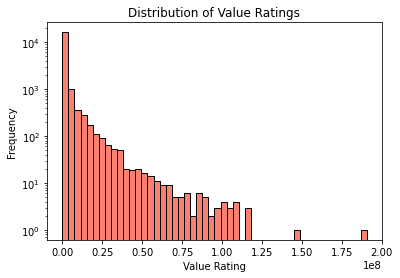

In [38]:
 # Second subplot for "value"
plt.hist(data['Value(in Euro)'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Value Ratings')
plt.xlabel('Value Rating')
plt.yscale('log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

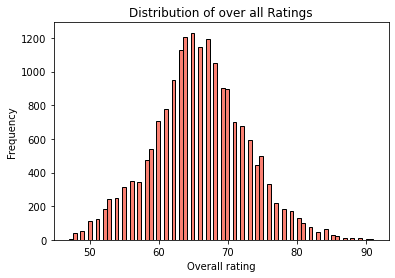

In [39]:
plt.hist(data['Overall'], bins = 80, color='salmon', edgecolor='black')
plt.title('Distribution of over all Ratings')
plt.xlabel('Overall rating')
plt.ylabel('Frequency')

**We can see that this distribution of the overall rating follows a normal distribution, hence the value doesn't show the same distribution which implies that the player's value is not  only decided by his skills, but also at we said before , there are other things to take in count like the age and the potential.**

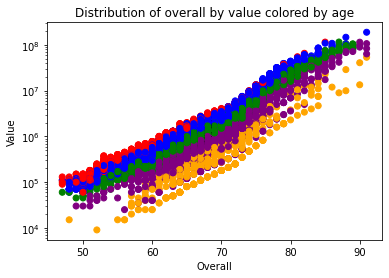

In [40]:
age_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
plt.scatter(data['Overall'] , data['Value(in Euro)'] , c=data['Age'].map(age_colors),
            cmap='viridis',
            label='Age Category')
plt.title('Distribution of overall by value colored by age')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.yscale('log')

**As we can see , the Overall combined with the age, can decide your value, as the age progresses, the value decreases and it goes the same for the Overall, as it goes up the Value goes up too, in the scatter we can see the well differentiated clusters.**

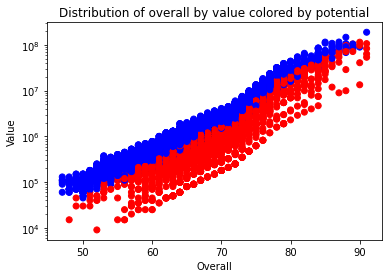

In [41]:
colors = (data['Potential'] > data['Overall']).astype(int)
age_colors = {0: 'red', 1: 'blue'}
plt.scatter(data['Overall'] , data['Value(in Euro)'] , c=colors.map(age_colors),
            cmap='viridis',
            label='Age Category')
plt.title('Distribution of overall by value colored by potential')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.yscale("log")

**Same thing goes for the potential, if your potential is bigger than your overall, means you are a good investement and then a better value than the others that have the same overall but no potential.**

In [42]:
df_encoded["DValue"], bin_edges_value = pd.cut(df_encoded['Value(in Euro)'], bins=15, labels=False, right=False, retbins=True)
df_encoded["DWage"], bin_edges_wage = pd.cut(df_encoded['Wage(in Euro)'], bins=15, labels=False, right=False, retbins=True)

**These are the intervals determining the classes. For example, a value between  0 and 1.27**

In [43]:
bin_edges_value

array([0.000000e+00, 1.270000e+07, 2.540000e+07, 3.810000e+07,
       5.080000e+07, 6.350000e+07, 7.620000e+07, 8.890000e+07,
       1.016000e+08, 1.143000e+08, 1.270000e+08, 1.397000e+08,
       1.524000e+08, 1.651000e+08, 1.778000e+08, 1.906905e+08])

In [44]:
bin_edges_wage

array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
       210000., 240000., 270000., 300000., 330000., 360000., 390000.,
       420000., 450450.])

In [45]:
bins = pd.DataFrame()
bins["class"] = np.arange(15)
bins["Lower Value"] = bin_edges_value[:-1]
bins["Upper Value"] = bin_edges_value[1:]
bins["Lower Wage"] = bin_edges_wage[:-1]
bins["Upper Wage"] = bin_edges_wage[1:]

In [46]:
bins

,class,Lower Value,Upper Value,Lower Wage,Upper Wage
0,0,0.0,12700000.0,0.0,30000.0
1,1,12700000.0,25400000.0,30000.0,60000.0
2,2,25400000.0,38100000.0,60000.0,90000.0
3,3,38100000.0,50800000.0,90000.0,120000.0
4,4,50800000.0,63500000.0,120000.0,150000.0
5,5,63500000.0,76200000.0,150000.0,180000.0
6,6,76200000.0,88900000.0,180000.0,210000.0
7,7,88900000.0,101600000.0,210000.0,240000.0
8,8,101600000.0,114300000.0,240000.0,270000.0
9,9,114300000.0,127000000.0,270000.0,300000.0


# Part 2 : 

In [47]:
clustering_data = df_encoded.loc[df_encoded['Best Position_GK'] == 0, df_encoded.columns.difference(['Nationality', 'Full Name','Overall', 'Wage(in Euro)', 'Value(in Euro)'])]


In [48]:
clustering_data.columns

Index([' GoalkeeperKicking', 'Acceleration', 'Age', 'Aggression', 'Agility',
       'Attacking Work Rate', 'BMI', 'Balance', 'BallControl', 'BaseStats',
       'Best Position_ATK', 'Best Position_DEF', 'Best Position_GK',
       'Best Position_MID', 'CAM Rating', 'CB Rating', 'CDM Rating',
       'CF Rating', 'CM Rating', 'Composure', 'Crossing', 'Curve', 'DValue',
       'DWage', 'Defending Total', 'Defensive Work Rate', 'Dribbling',
       'Dribbling Total', 'Finishing', 'Freekick Accuracy', 'GK Rating',
       'Goalkeeper Diving', 'Goalkeeper Handling', 'Goalkeeper Positioning',
       'Goalkeeper Reflexes', 'Heading Accuracy', 'Height(in m)',
       'Interceptions', 'International Reputation', 'Joined On', 'Jumping',
       'LB Rating', 'LF Rating', 'LM Rating', 'LW Rating', 'LWB Rating',
       'Long Shots', 'LongPassing', 'Marking', 'Pace Total', 'Passing Total',
       'Penalties', 'Physicality Total', 'Positioning', 'Potential',
       'Preferred Foot_Left', 'Preferred Foot_Rig

In [49]:
clustering_data = clustering_data.dropna()

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data = scaler.fit_transform(clustering_data)

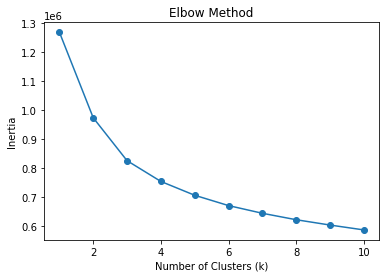

In [51]:
from sklearn.cluster import KMeans


k_values = range(1, 11)  
inertias = []  

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustering_data)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

As we can do the "méthode de coude" we can see that the best choice is to take the 3 as a number of clusters. 

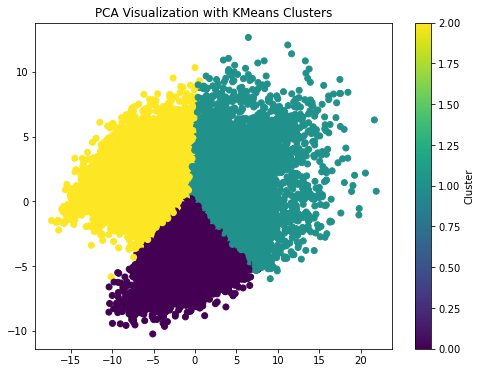

In [52]:

k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(clustering_data)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Change n_components to 3 for 3D visualization
dimension_reduced_data = pca.fit_transform(clustering_data)

plt.figure(figsize=(8, 6))
plt.scatter(
    dimension_reduced_data[:, 0],
    dimension_reduced_data[:, 1],
    c=clusters,
    cmap='viridis',  # You can choose a different colormap
    marker='o',
)
plt.title('PCA Visualization with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [53]:
grp1 = data.iloc[np.where(clusters == 0)]

In [54]:
grp2 = data.iloc[np.where(clusters == 1)]

In [55]:
grp3 = data.iloc[np.where(clusters == 2)]

In [56]:
grp1_enc = df_encoded.iloc[np.where(clusters == 0)]
grp2_enc = df_encoded.iloc[np.where(clusters == 1)]
grp3_enc = df_encoded.iloc[np.where(clusters == 2)]

In [57]:
grp3.describe()

,Overall,Potential,Value(in Euro),Age,TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,Height(in m)
count,5179.000000,5179.000000,5.179000e+03,5179.000000,5179.000000,5179.000000,5179.000000,5.179000e+03,5179.000000,5179.000000,...,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000
mean,64.904229,70.212396,1.421762e+06,1.625990,1584.054837,353.235567,4807.617301,2.424335e+06,2020.408573,2.926820,...,57.936667,55.724271,55.244835,55.724271,55.088820,53.937440,55.088820,22.599923,22.764237,1.816038
std,4.421027,5.362711,2.699720e+06,0.959849,237.044027,30.054317,8549.689606,5.242664e+06,1.992525,0.646359,...,12.681751,12.643554,12.586231,12.643554,12.966242,13.687864,12.966242,14.283202,1.384826,0.068669
min,58.000000,58.000000,0.000000e+00,0.000000,820.000000,249.000000,0.000000,0.000000e+00,2002.000000,1.000000,...,18.000000,17.000000,19.000000,17.000000,17.000000,19.000000,17.000000,11.000000,17.229246,1.580000
25%,62.000000,66.000000,5.000000e+05,1.000000,1494.000000,332.000000,1000.000000,7.430000e+05,2020.000000,3.000000,...,55.000000,52.000000,49.000000,52.000000,49.000000,44.000000,49.000000,17.000000,21.883657,1.770000
50%,64.000000,70.000000,8.500000e+05,1.000000,1621.000000,353.000000,2000.000000,1.300000e+06,2021.000000,3.000000,...,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000,22.743384,1.820000
75%,68.000000,74.000000,1.400000e+06,2.000000,1733.000000,373.000000,5000.000000,2.500000e+06,2022.000000,3.000000,...,66.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,19.000000,23.624795,1.870000
max,85.000000,89.000000,7.600000e+07,4.000000,2184.000000,462.000000,170000.000000,1.463000e+08,2022.000000,5.000000,...,84.000000,83.000000,82.000000,83.000000,83.000000,84.000000,83.000000,80.000000,29.684956,2.060000


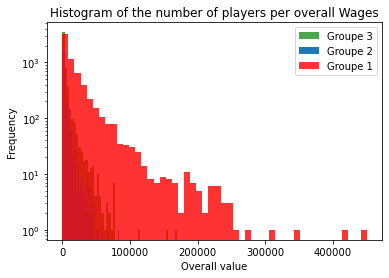

In [58]:
plt.hist(grp3['Wage(in Euro)'], bins=50, color="green", alpha=0.7, label="Groupe 3")
plt.hist(grp1['Wage(in Euro)'], bins=50, alpha=1, label="Groupe 2")
plt.hist(grp2['Wage(in Euro)'], bins=50, color="red", alpha=0.8, label="Groupe 1")

plt.legend()
plt.yscale('log')
plt.xlabel('Overall value')
plt.ylabel('Frequency')
plt.title('Histogram of the number of players per overall Wages')
plt.show()

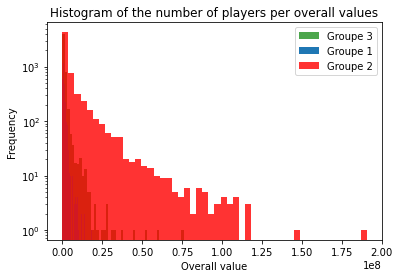

In [59]:
plt.hist(grp3['Value(in Euro)'], bins=50, color="green", alpha=0.7, label="Groupe 3")
plt.hist(grp1['Value(in Euro)'], bins=50, alpha=1, label="Groupe 1")
plt.hist(grp2['Value(in Euro)'], bins=50, color="red", alpha=0.8, label="Groupe 2")

plt.legend()
plt.yscale('log')
plt.xlabel('Overall value')
plt.ylabel('Frequency')
plt.title('Histogram of the number of players per overall values')
plt.show()

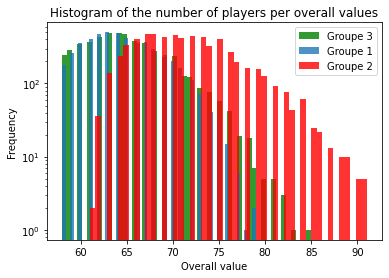

In [60]:
plt.hist(grp3['Overall'], bins=50, color="green", alpha=0.8, label="Groupe 3")
plt.hist(grp1['Overall'], bins=50, alpha=0.8, label="Groupe 1")
plt.hist(grp2['Overall'], bins=50, color="red", alpha=0.8, label="Groupe 2")

plt.legend()
plt.yscale('log')
plt.xlabel('Overall value')
plt.ylabel('Frequency')
plt.title('Histogram of the number of players per overall values')
plt.show()

In [61]:
grp3["Best Position"].unique()

array(['ATK', 'DEF', 'MID', 'GK'], dtype=object)

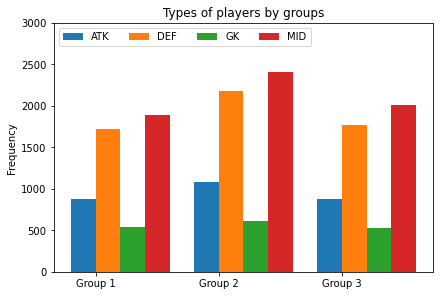

In [62]:
groups = ("Group 1", "Group 2", "Group 3")
best_positions = {
    'ATK': (grp1_enc["Best Position_ATK"].sum(), grp2_enc["Best Position_ATK"].sum(), grp3_enc["Best Position_ATK"].sum()),
    'DEF': (grp1_enc["Best Position_DEF"].sum(), grp2_enc["Best Position_DEF"].sum(), grp3_enc["Best Position_DEF"].sum()),
    'GK': (grp1_enc["Best Position_GK"].sum(), grp2_enc["Best Position_GK"].sum(), grp3_enc["Best Position_GK"].sum()),
    'MID': (grp1_enc["Best Position_MID"].sum(), grp2_enc["Best Position_MID"].sum(), grp3_enc["Best Position_MID"].sum()),
}

x = np.arange(len(groups))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in best_positions.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Types of players by groups')
ax.set_xticks(x + width / 2)  # Centering the xticks for each group
ax.set_xticklabels(groups)  # Setting group labels for xticks
ax.legend(loc='upper left', ncol=4)
ax.set_ylim(0, 3000)

plt.show()


In [63]:
grp1.describe()

,Overall,Potential,Value(in Euro),Age,TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,Height(in m)
count,5010.000000,5010.000000,5.010000e+03,5010.000000,5010.000000,5010.000000,5010.000000,5.010000e+03,5010.000000,5010.000000,...,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000
mean,64.625749,69.902994,1.131519e+06,1.629341,1577.509381,352.602794,4030.558882,1.894048e+06,2020.503792,2.927545,...,57.513573,55.452495,55.002994,55.452495,54.855090,53.757485,54.855090,22.833533,22.770509,1.815289
std,3.970325,5.210538,1.191311e+06,0.952316,237.132732,29.277462,5836.441553,2.316172e+06,1.893365,0.649754,...,12.728546,12.758231,12.596483,12.758231,13.069976,13.665750,13.069976,14.690710,1.388008,0.067548
min,58.000000,58.000000,0.000000e+00,0.000000,832.000000,263.000000,0.000000,0.000000e+00,2004.000000,1.000000,...,18.000000,17.000000,20.000000,17.000000,17.000000,18.000000,17.000000,10.000000,17.632378,1.550000
25%,62.000000,66.000000,5.000000e+05,1.000000,1489.000000,332.000000,1000.000000,7.250000e+05,2020.000000,3.000000,...,55.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000,21.913580,1.770000
50%,64.000000,70.000000,8.250000e+05,1.000000,1617.500000,352.000000,2000.000000,1.300000e+06,2021.000000,3.000000,...,61.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,18.000000,22.783309,1.810000
75%,67.000000,73.000000,1.300000e+06,2.000000,1731.000000,373.000000,4000.000000,2.300000e+06,2022.000000,3.000000,...,65.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,19.000000,23.629490,1.860000
max,79.000000,88.000000,1.850000e+07,4.000000,2116.000000,446.000000,84000.000000,3.650000e+07,2022.000000,5.000000,...,78.000000,78.000000,77.000000,78.000000,79.000000,81.000000,79.000000,77.000000,30.103806,2.030000


In [64]:
grp2.describe()

,Overall,Potential,Value(in Euro),Age,TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,Height(in m)
count,6289.000000,6289.000000,6.289000e+03,6289.000000,6289.000000,6289.000000,6289.000000,6.289000e+03,6289.000000,6289.000000,...,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000
mean,71.443950,74.441406,6.326843e+06,1.987597,1736.794244,385.339482,18490.387979,1.132732e+07,2020.044681,3.052632,...,63.683574,61.345683,61.338210,61.345683,60.563365,59.352520,60.563365,24.016060,22.962568,1.817203
std,5.210494,5.735041,1.209820e+07,0.905966,251.335674,33.727990,29735.497958,2.340424e+07,2.350100,0.709529,...,13.516661,13.534404,13.548504,13.534404,13.909702,14.803524,13.909702,16.033875,1.384207,0.068694
min,61.000000,62.000000,0.000000e+00,0.000000,859.000000,274.000000,0.000000,0.000000e+00,2005.000000,1.000000,...,20.000000,19.000000,21.000000,19.000000,19.000000,21.000000,19.000000,11.000000,16.568047,1.560000
25%,67.000000,70.000000,1.200000e+06,1.000000,1632.000000,363.000000,3000.000000,1.600000e+06,2019.000000,3.000000,...,60.000000,57.000000,54.000000,57.000000,54.000000,49.000000,54.000000,18.000000,22.090730,1.770000
50%,71.000000,74.000000,2.100000e+06,2.000000,1774.000000,385.000000,8000.000000,3.400000e+06,2021.000000,3.000000,...,67.000000,65.000000,65.000000,65.000000,64.000000,64.000000,64.000000,19.000000,22.944089,1.820000
75%,75.000000,78.000000,5.500000e+06,3.000000,1901.000000,408.000000,22000.000000,9.400000e+06,2022.000000,3.000000,...,72.000000,70.000000,71.000000,70.000000,70.000000,70.000000,70.000000,20.000000,23.822715,1.870000
max,91.000000,95.000000,1.905000e+08,4.000000,2312.000000,502.000000,450000.000000,3.667000e+08,2022.000000,5.000000,...,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000,29.761905,2.040000


In [65]:
grp3.describe()

,Overall,Potential,Value(in Euro),Age,TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,Height(in m)
count,5179.000000,5179.000000,5.179000e+03,5179.000000,5179.000000,5179.000000,5179.000000,5.179000e+03,5179.000000,5179.000000,...,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000
mean,64.904229,70.212396,1.421762e+06,1.625990,1584.054837,353.235567,4807.617301,2.424335e+06,2020.408573,2.926820,...,57.936667,55.724271,55.244835,55.724271,55.088820,53.937440,55.088820,22.599923,22.764237,1.816038
std,4.421027,5.362711,2.699720e+06,0.959849,237.044027,30.054317,8549.689606,5.242664e+06,1.992525,0.646359,...,12.681751,12.643554,12.586231,12.643554,12.966242,13.687864,12.966242,14.283202,1.384826,0.068669
min,58.000000,58.000000,0.000000e+00,0.000000,820.000000,249.000000,0.000000,0.000000e+00,2002.000000,1.000000,...,18.000000,17.000000,19.000000,17.000000,17.000000,19.000000,17.000000,11.000000,17.229246,1.580000
25%,62.000000,66.000000,5.000000e+05,1.000000,1494.000000,332.000000,1000.000000,7.430000e+05,2020.000000,3.000000,...,55.000000,52.000000,49.000000,52.000000,49.000000,44.000000,49.000000,17.000000,21.883657,1.770000
50%,64.000000,70.000000,8.500000e+05,1.000000,1621.000000,353.000000,2000.000000,1.300000e+06,2021.000000,3.000000,...,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000,22.743384,1.820000
75%,68.000000,74.000000,1.400000e+06,2.000000,1733.000000,373.000000,5000.000000,2.500000e+06,2022.000000,3.000000,...,66.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,19.000000,23.624795,1.870000
max,85.000000,89.000000,7.600000e+07,4.000000,2184.000000,462.000000,170000.000000,1.463000e+08,2022.000000,5.000000,...,84.000000,83.000000,82.000000,83.000000,83.000000,84.000000,83.000000,80.000000,29.684956,2.060000


In [66]:
# Validation des clusters :

# Coefficient de silhouette
from sklearn.metrics import silhouette_score
#>>> from sklearn.cluster import KMeans
#>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
#labels = kmeans_model.labels_
#>>> metrics.silhouette_score(X, labels, metric='euclidean')
#0.55...
print(f"Score de silhouette : {silhouette_score(clustering_data, kmeans.labels_)}")

# Coefficient de Davies-Boulding
from sklearn.metrics import davies_bouldin_score
silhouette_score(clustering_data, kmeans.labels_)
# Pour la suite est-ce que dans la partie 3 tous les clusters sont équilibrés ?
# (indice les salaires)
print(f"Score de Davies-Bouldin : {davies_bouldin_score(clustering_data, kmeans.labels_)}")

Score de silhouette : 0.19169718787574996
Score de Davies-Bouldin : 1.6517444432071227


In [67]:
# AgglomerativeClustering :
from sklearn.cluster import AgglomerativeClustering
k = 3
agglo_clust = AgglomerativeClustering(n_clusters=k)
agclusters = agglo_clust.fit_predict(clustering_data)
print(f"Score de silhouette : {silhouette_score(clustering_data, agglo_clust.labels_)}")
print(f"Score de Davies-Bouldin : {davies_bouldin_score(clustering_data, agglo_clust.labels_)}")

Score de silhouette : 0.15809559881128754
Score de Davies-Bouldin : 1.7629430488279672


In [68]:
# BisectingKMeans
from sklearn.cluster import BisectingKMeans
k = 3
bisectingkmeans = BisectingKMeans(n_clusters=k)
bkclusters = bisectingkmeans.fit_predict(clustering_data)
print(f"Score de silhouette : {silhouette_score(clustering_data, bisectingkmeans.labels_)}")
print(f"Score de Davies-Bouldin : {davies_bouldin_score(clustering_data, bisectingkmeans.labels_)}")

Score de silhouette : 0.156757759563077
Score de Davies-Bouldin : 1.872774146689762


In [69]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.drop(columns=['Nationality', "DWage" , "DValue",'Full Name','Overall', 'Wage(in Euro)', 'Value(in Euro)']))

In [70]:
scaled_data

array([[ 3.22691791,  2.37846143,  2.15222132, ...,  1.27540769,
         1.76784562, -1.76784562],
       [ 3.22691791,  1.36633508,  1.99480031, ..., -0.78406302,
        -0.56566025,  0.56566025],
       [ 3.22691791,  1.36633508,  2.20713562, ..., -0.78406302,
        -0.56566025,  0.56566025],
       ...,
       [-0.64861336, -1.67004396, -0.98521597, ...,  1.27540769,
        -0.56566025,  0.56566025],
       [-1.61749618, -1.67004396, -1.79062577, ..., -0.78406302,
        -0.56566025,  0.56566025],
       [-3.39378135,  0.35420873, -1.19022937, ..., -0.78406302,
         1.76784562, -1.76784562]])

In [71]:
name_and_scaled_data = pd.concat((df_encoded["Full Name"], pd.DataFrame(scaled_data)), axis=1)

In [72]:
mbappe_scaled = name_and_scaled_data[name_and_scaled_data["Full Name"] == "Kylian Mbappé"]

In [73]:
np_encoded = name_and_scaled_data[name_and_scaled_data["Full Name"] != "Kylian Mbappé"].to_numpy()

given_row = mbappe_scaled.iloc[0, 1:].to_numpy()

print(given_row.shape , np_encoded[: , 1: ].shape)

(76,) (18538, 76)


In [74]:
np_encoded[: , 1: ].astype('float64')

array([[ 3.22691791,  2.37846143,  2.15222132, ...,  1.27540769,
         1.76784562, -1.76784562],
       [ 3.22691791,  1.36633508,  1.99480031, ..., -0.78406302,
        -0.56566025,  0.56566025],
       [ 3.22691791,  1.36633508,  2.20713562, ..., -0.78406302,
        -0.56566025,  0.56566025],
       ...,
       [-0.64861336, -1.67004396, -0.98521597, ...,  1.27540769,
        -0.56566025,  0.56566025],
       [-1.61749618, -1.67004396, -1.79062577, ..., -0.78406302,
        -0.56566025,  0.56566025],
       [-3.39378135,  0.35420873, -1.19022937, ..., -0.78406302,
         1.76784562, -1.76784562]])

In [75]:
distance = np.linalg.norm(np.abs(np_encoded[: , 1: ].astype('float64') - given_row.astype('float64')), axis=1)

In [76]:
nearest = np.argmin(distance)

In [77]:
np_encoded[nearest][0]

'Erling Haaland'

In [78]:
np_encoded.shape

(18538, 77)

# Part 3 : 

In [79]:
yw = df_encoded["DWage"]
yv = df_encoded["DValue"]

X = df_encoded.drop(columns=['Nationality', "DWage" , "DValue", 'Overall', 'Full Name', 'Wage(in Euro)', 'Value(in Euro)'])

Removing or putting the Overall value doesnt change much for the scores.

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X, yw, test_size=0.2, random_state=42)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X, yv, test_size=0.2, random_state=42)

## DWage and DValue classification

In [81]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(Xw_train, yw_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred = tree_model.predict(Xw_test)

In [83]:
from sklearn.metrics import accuracy_score


In [84]:
accuracy = accuracy_score(yw_test, y_pred)
accuracy

0.9252966558791802

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

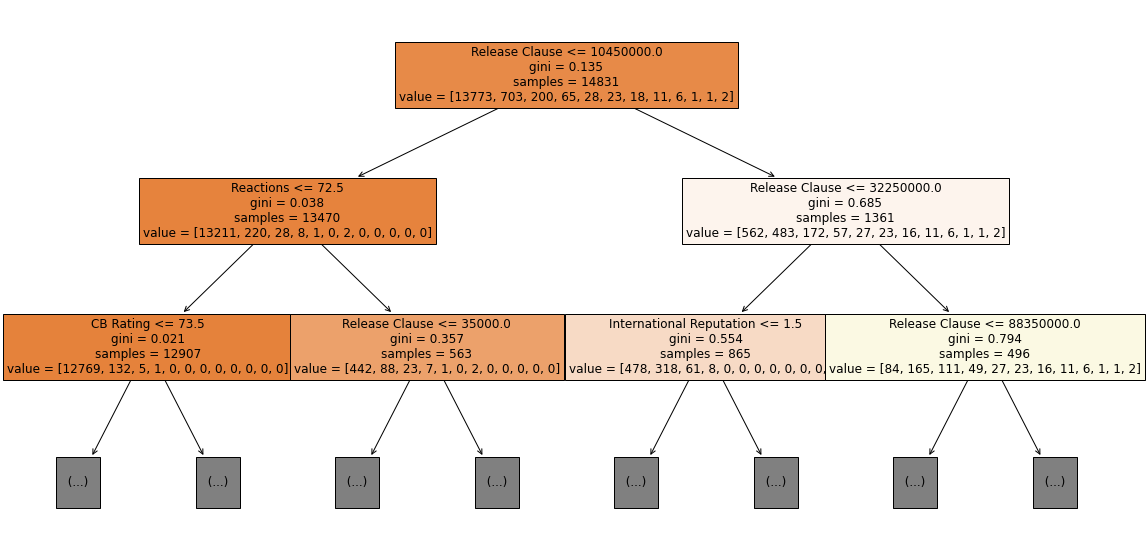

In [86]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, max_depth=2, fontsize=12, feature_names=Xw_train.columns)
plt.show()

0.9816612729234089


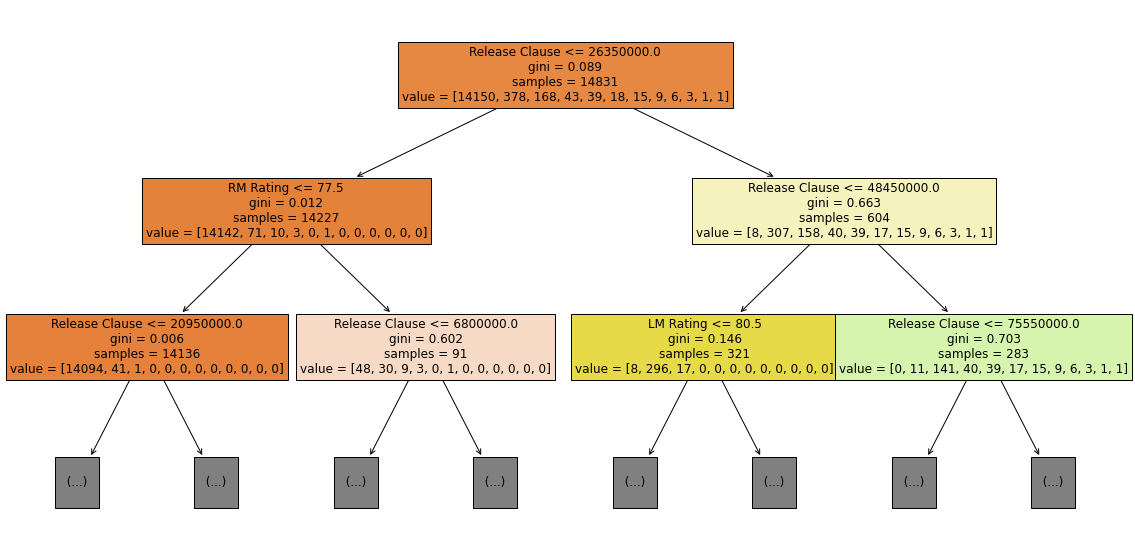

In [87]:
tree_modelv = DecisionTreeClassifier(random_state=42)
tree_modelv.fit(Xv_train, yv_train)
y_pred = tree_modelv.predict(Xv_test)
accuracy = accuracy_score(yv_test, y_pred)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_modelv, filled=True, max_depth=2, fontsize=12, feature_names=Xv_train.columns)
plt.show()

### Trees when keeping Overall value

In [88]:
yw_bis = df_encoded["DWage"]
yv_bis = df_encoded["DValue"]

X_bis = df_encoded.drop(columns=['Nationality', "DWage" , "DValue", 'Full Name', 'Wage(in Euro)', 'Value(in Euro)'])

In [89]:
Xw_train_bis, Xw_test_bis, yw_train_bis, yw_test_bis = train_test_split(X_bis, yw_bis, test_size=0.2, random_state=42)
Xv_train_bis, Xv_test_bis, yv_train_bis, yv_test_bis = train_test_split(X_bis, yv_bis, test_size=0.2, random_state=42)

0.9239482200647249


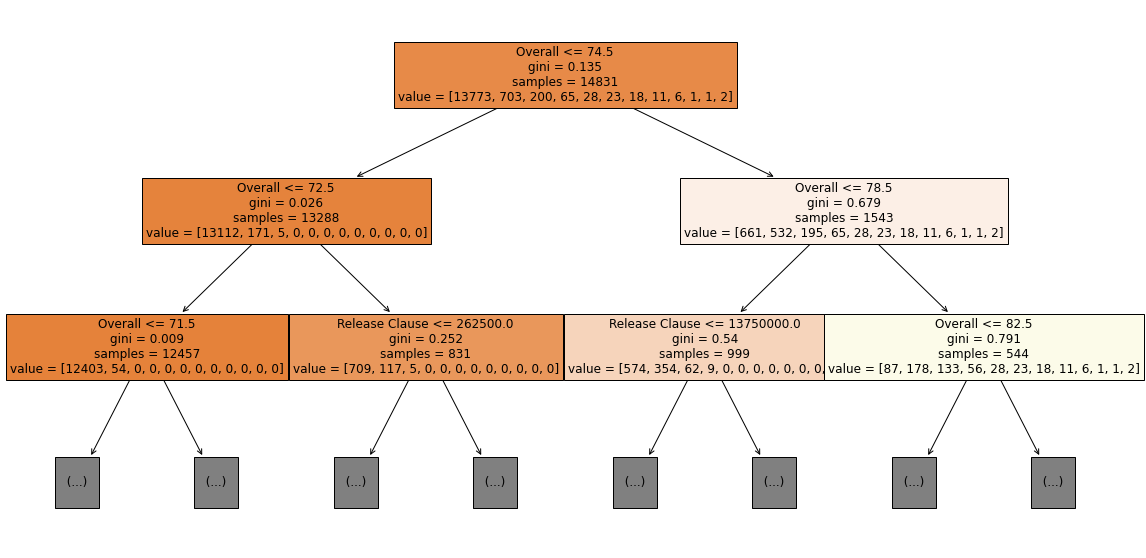

0.9862459546925566


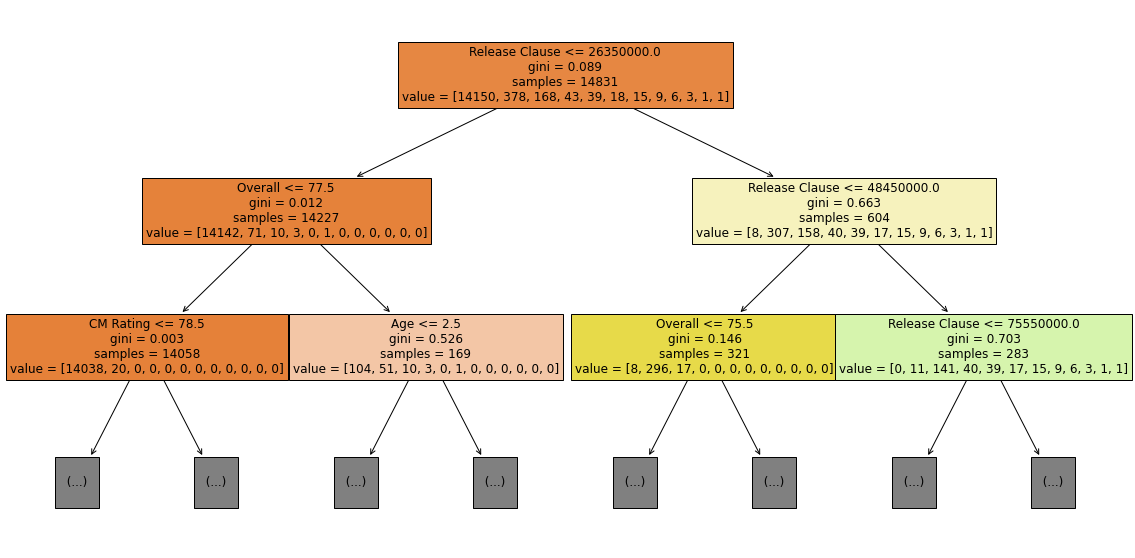

In [90]:
tree_model_bis = DecisionTreeClassifier(random_state=42)
tree_model_bis.fit(Xw_train_bis, yw_train_bis)
y_pred_bis = tree_model_bis.predict(Xw_test_bis)
accuracy = accuracy_score(yw_test_bis, y_pred_bis)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_model_bis, filled=True, max_depth=2, fontsize=12, feature_names=Xw_train_bis.columns)
plt.show()

tree_modelv_bis = DecisionTreeClassifier(random_state=42)
tree_modelv_bis.fit(Xv_train_bis, yv_train_bis)
y_pred_bis = tree_modelv_bis.predict(Xv_test_bis)
accuracy = accuracy_score(yv_test_bis, y_pred_bis)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_modelv_bis, filled=True, max_depth=2, fontsize=12, feature_names=Xv_train_bis.columns)
plt.show()

In [91]:
df_encoded[["Full Name", "TotalStats"]].sort_values(by="TotalStats")

,Full Name,TotalStats
18246,Anıl Demir,759
18501,Xiongtao Deng,762
17984,Ollie Battersby,777
18245,Fei Wu,777
18430,Jiabao Ji,779
...,...,...
58,Nicolò Barella,2296
3,Kevin De Bruyne,2303
77,Marcos Acuña,2303
53,Bruno Miguel Borges Fernandes,2305


In [92]:
# Logistic Regression, to find the bin of the Dwages and Dvalues
from sklearn.linear_model import LogisticRegression
lrw = LogisticRegression(random_state=42).fit(Xw_train, yw_train)
lrw.score(Xw_test, yw_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9339266450916937

In [93]:
lrv = LogisticRegression(random_state=42).fit(Xv_train, yv_train)
lrv.score(Xv_test, yv_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9608953613807982

In [95]:
# To explain, we will use the odds ratio to check importance of each variable
df_or = pd.DataFrame(np.array(Xw_train.columns)[np.argsort(-np.exp(lrw.coef_), axis=1)].T)

In [96]:
df_or

,0,1,2,3,4,5,6,7,8,9,10,11
0,Joined On,Release Clause,Release Clause,Release Clause,Release Clause,Release Clause,Release Clause,Release Clause,Release Clause,Best Position_GK,Best Position_GK,Release Clause
1,TotalStats,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_ATK,Best Position_ATK,Best Position_GK
2,BaseStats,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Preferred Foot_Left,Preferred Foot_Left,Best Position_ATK
3,Potential,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Best Position_DEF,Best Position_DEF,Preferred Foot_Left
4,Pace Total,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_MID,Best Position_MID,Best Position_DEF
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Best Position_MID,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Potential,Potential,Pace Total
72,Best Position_DEF,Potential,Potential,Potential,Potential,Potential,Potential,Potential,Potential,BaseStats,BaseStats,Potential
73,Preferred Foot_Left,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,TotalStats,Release Clause,BaseStats
74,Best Position_ATK,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,Joined On,TotalStats,TotalStats


In [97]:
df_or2 = pd.DataFrame(-np.sort(-np.exp(lrw.coef_), axis=1).T)
df_or2

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000291,1.000003,1.000003,1.000002,1.000002,1.000002,1.000002,1.000003,1.000002,1.000000,1.000000,1.000002
1,1.000224,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000050,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.000000,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000
72,1.000000,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999998,0.999999,1.000000
73,1.000000,0.999994,0.999993,0.999993,0.999994,0.999995,0.999995,0.999995,0.999996,0.999993,0.999995,0.999998
74,1.000000,0.999971,0.999967,0.999970,0.999975,0.999976,0.999977,0.999978,0.999984,0.999990,0.999994,0.999992


**Here is the table of the odd ratio, computed using the exponential on the LogisticRegression coefficients. A value above 1 means that the more the value increases, the likelier we get that class. If the value is 1, it means that the value doesn't influence the class, and if it is below 1, it means that the value has to decrease to increase the likelihood of having that class. As we can see, we still mostly obtain the release clause at the top for the wage. However, the other categories are different. These categories, such as being a goalkeeper, do not influence (or influences in a small way). If the joined on (year the player joined the game) value increases (meaning the player is younger, usually), the wage will be lower. Same thing for Potential, which we saw earlier meant that the player was younger, and still had room to grow. These values have an odd ratio below 1 for the other classes, which means they reduce the chances of being in another class. There are a few values in the last class which are TotalStats and BaseStats which are a little odd to find, since it increases performance.**


**Note : The number of players for the higher classes are so low that some classes had 0 players in the training, which means there are only 12 classes in the model.**

In [108]:
df_orv = pd.DataFrame(np.array(Xv_train.columns)[np.argsort(-np.exp(lrv.coef_), axis=1)].T)
df_orv

,0,1,2,3,4,5,6,7,8,9,10,11
0,Joined On,Release Clause,Release Clause,Release Clause,Release Clause,Best Position_GK,Release Clause,Release Clause,Release Clause,Best Position_GK,Best Position_GK,Best Position_GK
1,TotalStats,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_ATK,Best Position_GK,Best Position_GK,Best Position_GK,Best Position_ATK,Best Position_ATK,Best Position_ATK
2,BaseStats,Best Position_ATK,Best Position_ATK,Best Position_ATK,Best Position_ATK,Preferred Foot_Left,Best Position_ATK,Best Position_ATK,Best Position_ATK,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left
3,Potential,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Best Position_DEF,Preferred Foot_Left,Preferred Foot_Left,Preferred Foot_Left,Best Position_DEF,Best Position_DEF,Best Position_DEF
4,Pace Total,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_MID,Best Position_DEF,Best Position_DEF,Best Position_DEF,Best Position_MID,Best Position_MID,Best Position_MID
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Best Position_MID,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Pace Total,Potential,Potential,Potential
72,Best Position_DEF,Potential,Potential,Potential,Potential,Potential,Potential,Potential,Potential,Release Clause,Release Clause,BaseStats
73,Preferred Foot_Left,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,BaseStats,Release Clause
74,Best Position_ATK,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats,TotalStats


In [109]:
df_orv2 = pd.DataFrame(-np.sort(-np.exp(lrv.coef_), axis=1).T)
df_orv2

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000743,1.000001,1.000001,1.000001,1.000001,1.000000,1.000001,1.000001,1.000001,1.000000,1.000000,1.000000
1,1.000575,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000026,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000025,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.000000,0.999997,0.999996,0.999997,0.999997,0.999998,0.999998,0.999998,0.999998,0.999999,0.999999,0.999999
72,1.000000,0.999997,0.999996,0.999997,0.999997,0.999997,0.999997,0.999998,0.999998,0.999998,0.999996,0.999995
73,1.000000,0.999983,0.999982,0.999985,0.999984,0.999987,0.999987,0.999989,0.999990,0.999993,0.999995,0.999995
74,1.000000,0.999923,0.999917,0.999934,0.999929,0.999944,0.999942,0.999952,0.999957,0.999968,0.999980,0.999978


**Here, we have a little difference: for the higher classes, the release clause lowers the chance of being on the higher values. This could be a problem with the number of players in that class, because as said below, we only have 6, 1, 1, and 2 players on the four highest classes.**

In [110]:
table = pd.DataFrame({"Classes":np.unique(yv_train, return_counts=True)[0], "Number of players":np.unique(yw_train, return_counts=True)[1]}, index=None)
table

,Classes,Number of players
0,0,13773
1,1,703
2,2,200
3,3,65
4,4,28
5,5,23
6,6,18
7,7,11
8,8,6
9,9,1


In [111]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [112]:
gnbw = GaussianNB().fit(Xw_train, yw_train)
gnbw.score(Xw_test, yw_test)

0.9366235167206041

In [113]:
gnbv = GaussianNB().fit(Xv_train, yv_train)
gnbv.score(Xv_test, yv_test)

0.9692556634304207

In [114]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(gnbw, Xw_test, yw_test)

In [115]:
Xw_test.columns[(-imps.importances_mean).argsort()]

Index(['Release Clause', 'BaseStats', 'TotalStats', 'Potential', 'CF Rating',
       'LF Rating', 'LW Rating', 'ST Rating', 'Goalkeeper Reflexes',
       'Goalkeeper Positioning', ' GoalkeeperKicking', 'Goalkeeper Diving',
       'RF Rating', 'Sliding Tackle', 'Standing Tackle', 'Marking',
       'Composure', 'Penalties', 'Goalkeeper Handling', 'RW Rating',
       'LM Rating', 'Vision', 'Best Position_MID', 'Best Position_GK',
       'Best Position_DEF', 'Best Position_ATK', 'Height(in m)', 'BMI',
       'GK Rating', 'RB Rating', 'CB Rating', 'LB Rating', 'RWB Rating',
       'CDM Rating', 'LWB Rating', 'RM Rating', 'CM Rating', 'CAM Rating',
       'Positioning', 'Aggression', 'Preferred Foot_Left', 'Crossing',
       'Physicality Total', 'Defending Total', 'Dribbling Total',
       'Passing Total', 'Shooting Total', 'Finishing', 'Pace Total',
       'Attacking Work Rate', 'International Reputation', 'Skill Moves',
       'Weak Foot Rating', 'Joined On', 'Age', 'Defensive Work Rate',


In [116]:
impsv = permutation_importance(gnbv, Xv_test, yv_test)
Xv_test.columns[(-impsv.importances_mean).argsort()]

Index(['Release Clause', 'TotalStats', 'Potential', 'CF Rating', 'LF Rating',
       'LW Rating', 'ST Rating', 'Goalkeeper Reflexes',
       'Goalkeeper Positioning', ' GoalkeeperKicking', 'Goalkeeper Handling',
       'Goalkeeper Diving', 'Sliding Tackle', 'Standing Tackle', 'Marking',
       'Composure', 'Penalties', 'RF Rating', 'RW Rating', 'LM Rating',
       'Vision', 'Best Position_MID', 'Best Position_GK', 'Best Position_DEF',
       'Best Position_ATK', 'Height(in m)', 'BMI', 'GK Rating', 'RB Rating',
       'CB Rating', 'LB Rating', 'RWB Rating', 'CDM Rating', 'LWB Rating',
       'RM Rating', 'CM Rating', 'CAM Rating', 'Positioning', 'Aggression',
       'Preferred Foot_Left', 'Crossing', 'Physicality Total',
       'Defending Total', 'Dribbling Total', 'Passing Total', 'Shooting Total',
       'Pace Total', 'Defensive Work Rate', 'Attacking Work Rate',
       'International Reputation', 'Skill Moves', 'Weak Foot Rating',
       'Joined On', 'BaseStats', 'Age', 'Finishing', 

In [117]:
# SVM - SVC

In [118]:
from sklearn.svm import SVC
svcw = SVC().fit(Xw_train, yw_train)
print(gnbw.score(Xw_test, yw_test))

svcv = SVC().fit(Xv_train, yv_train)
print(gnbv.score(Xv_test, yv_test))

0.9366235167206041
0.9692556634304207


In [122]:
# LDA

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [124]:
lda_w = LinearDiscriminantAnalysis().fit(Xw_train, yw_train)
print(lda_w.score(Xw_test, yw_test))

lda_v = LinearDiscriminantAnalysis().fit(Xv_train, yv_train)
print(lda_v.score(Xv_test, yv_test))

0.9314994606256742
0.9795037756202805


## Original Wage and Value variable predictions with regressions

In [125]:
ywr = df_encoded["Wage(in Euro)"]
yvr = df_encoded["Value(in Euro)"]

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
Xw_train_r, Xw_test_r, yw_train_r, yw_test_r = train_test_split(X, ywr, test_size=0.2, random_state=43)
Xv_train_r, Xv_test_r, yv_train_r, yv_test_r = train_test_split(X, yvr, test_size=0.2, random_state=43)

In [127]:
# Linear regression to find Player Wage :
from sklearn.linear_model import LinearRegression
lrw = LinearRegression().fit(Xw_train_r, yw_train_r)
lrw.score(Xw_test_r, yw_test_r)

0.6990412257171682

In [128]:
yw_test_r

17455      550
12714     4000
3522     18000
2028     21000
10251     3000
         ...  
17338     2000
5108      6000
10249     4000
17411      500
4012      5000
Name: Wage(in Euro), Length: 3708, dtype: int64

In [129]:
# Linear regression to find Player Value :
from sklearn.linear_model import LinearRegression
lrv = LinearRegression().fit(Xv_train_r, yv_train_r)
lrv.score(Xv_test_r, yv_test_r)

0.9602817373888058

In [130]:
# Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtrw = DecisionTreeRegressor().fit(Xw_train_r, yw_train_r)
dtrw.score(Xw_test_r, yw_test_r)

0.5518332179165399

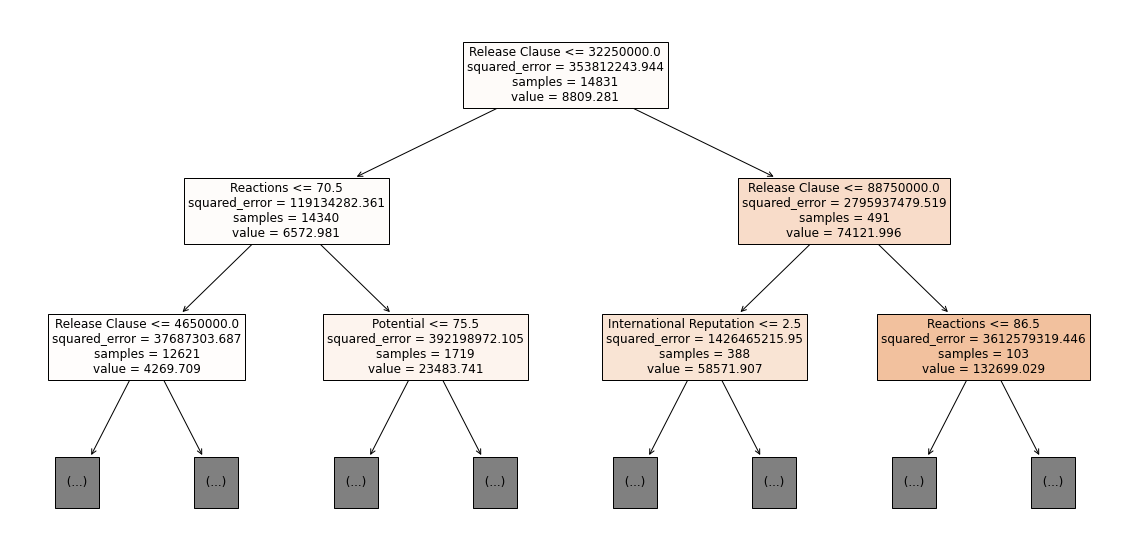

In [131]:
plt.figure(figsize=(20,10))
plot_tree(dtrw, filled=True, max_depth=2, fontsize=12, feature_names=Xw_train_r.columns)
plt.show()

In [132]:
# Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtrv = DecisionTreeRegressor().fit(Xv_train_r, yv_train_r)
dtrv.score(Xv_test_r, yv_test_r)

0.9768110897182584

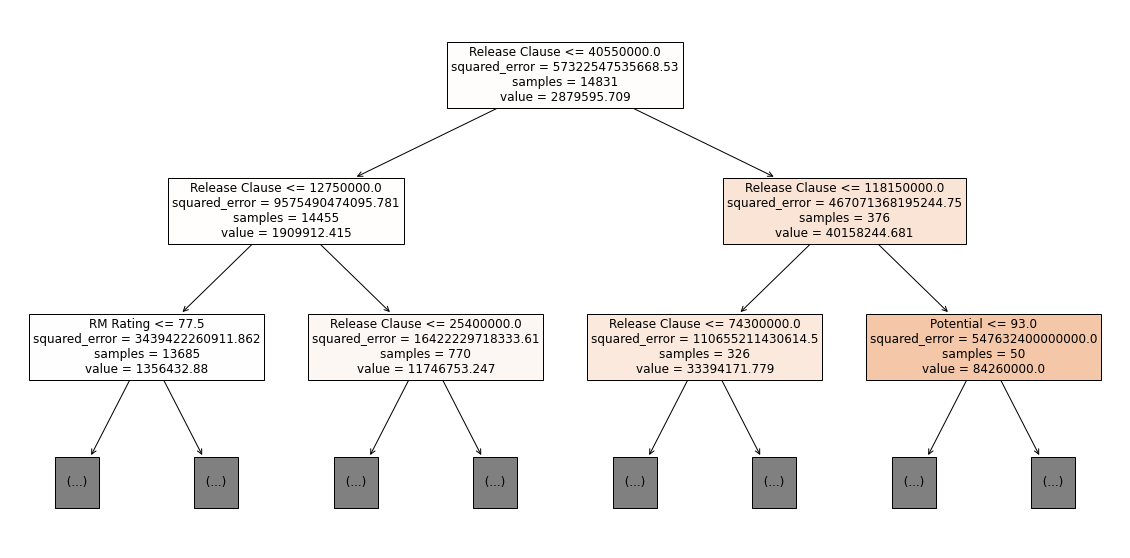

In [133]:
plt.figure(figsize=(20,10))
plot_tree(dtrv, filled=True, max_depth=2, fontsize=12, feature_names=Xw_train_r.columns)
plt.show()

### 5. Only certain categories

In [134]:
selected_columns = ['Overall', 'International Reputation', 'Weak Foot Rating', 'Skill Moves']


In [135]:
X_5 = df_encoded[selected_columns]

In [136]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X, yv, test_size=0.2, random_state=42)


In [137]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor().fit(X5_train, y5_train)
clf.score(X5_test, y5_test)

0.9177166806618505

In [138]:
# Linear regression to find Player Value :
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X5_train, y5_train)
clf.score(X5_test, y5_test)

0.9005831877512445

## Interpretation : 


**We can see that the score has fallen , that means we lose information by deleting the columns. That means deleting the columns is not a great idea , still a score of 0.92 and 0.90 is not a bad score. But still it's a bad thing to lose score unless if it means the training phase goes much faster.**

## French players

Est-ce que ce qui rend un joueur cher rend un français cher ? i.e. si on se restreint aux
joueurs français arrive-t-on aux mêmes conclusions ?

In [139]:
# We must check if a french player is well predicted in terms of value

In [140]:
X_fr = df_encoded.drop(columns=["DWage", "DValue", 'Full Name', 'Overall', 'Wage(in Euro)', 'Value(in Euro)'])

In [141]:
X_fr = X_fr[X_fr["Nationality"] == "France"]

In [142]:
X_fr.index

Index([    1,     4,    19,    33,    37,    56,    61,    66,    74,    86,
       ...
       17810, 17814, 17821, 17822, 17848, 17917, 17938, 17976, 17981, 18008],
      dtype='int64', length=963)

In [143]:
X_fr = X_fr.drop(columns="Nationality")

In [144]:
yv_fr = df_encoded["DValue"][X_fr.index]
yw_fr = df_encoded["DWage"][X_fr.index]

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
Xw_train_fr, Xw_test_fr, yw_train_fr, yw_test_fr = train_test_split(X_fr, yw_fr, test_size=0.2, random_state=42)
Xv_train_fr, Xv_test_fr, yv_train_fr, yv_test_fr = train_test_split(X_fr, yv_fr, test_size=0.2, random_state=42)

0.9481865284974094


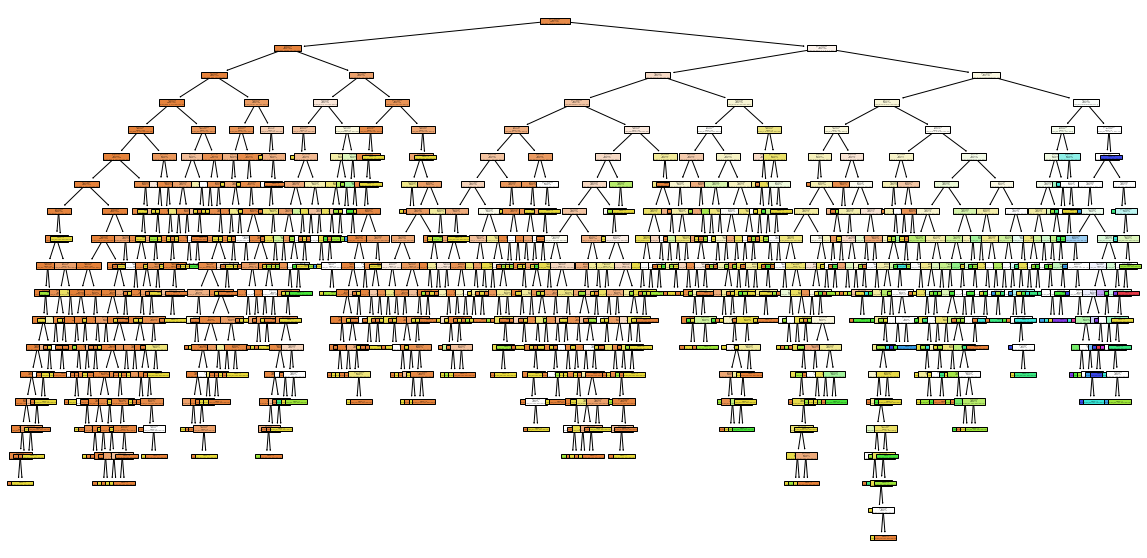

In [146]:
y_pred_v_fr = tree_model.predict(Xv_test_fr)
accuracy = accuracy_score(yv_test_fr, y_pred_v_fr)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True)
plt.show()

0.9792746113989638


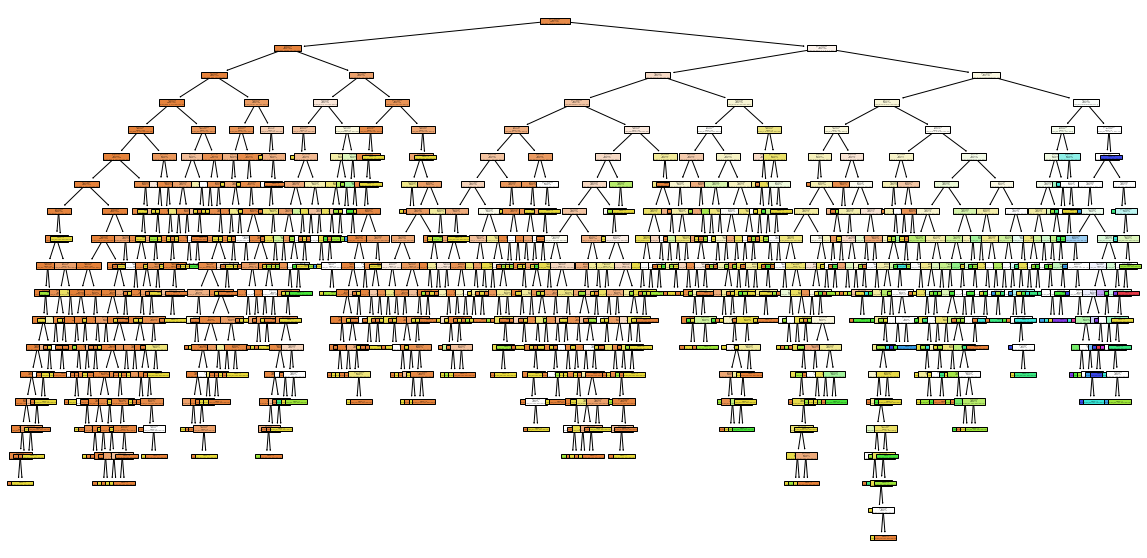

In [147]:
y_pred_w_fr = tree_model.predict(Xw_test_fr)
accuracy = accuracy_score(yw_test_fr, y_pred_w_fr)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True)
plt.show()

In [148]:
tree_model.decision_path(Xw_train_fr)

<770x1147 sparse matrix of type '<class 'numpy.int64'>'
	with 10286 stored elements in Compressed Sparse Row format>

### Interpretation : 

We can see that the model have a better results when the players used to in the training process are only the french players, that means all the french players are evaluated on the same bases , either all overpriced, all underpriced or all have the fair price for the qualtiy they provide. And we can say for sure that the nationality plays a role in the evaluation of the player, since when we use international players, we have a worst score that for sure means either some players are under or over priced , we can not for the moment know which one is , further investigation is needed to determine. So to answer the question does the nationality playes a role in the evaluation ? probably yes , should it play a role ? Maybe , depending on the context , as in reality we can see that african players are not as wanted as european players sicne the schedule of the african nation cup interfers with the schedule of european leagues. 


**We now train a model on all players except the french ones and see if the model has a good accuracy on those players.**

In [149]:
X_not_fr = df_encoded.drop(columns=["DWage", "DValue", 'Full Name', 'Overall', 'Wage(in Euro)', 'Value(in Euro)'])
X_not_fr = X_not_fr[X_not_fr["Nationality"] != "France"]
X_not_fr.index
X_not_fr = X_not_fr.drop(columns="Nationality")

In [150]:
yv_not_fr = df_encoded["DValue"][X_not_fr.index]
yw_not_fr = df_encoded["DWage"][X_not_fr.index]

In [151]:
Xw_train_not_fr, Xw_test_not_fr, yw_train_not_fr, yw_test_not_fr = train_test_split(X_not_fr, yw_not_fr, test_size=0.2, random_state=42)
Xv_train_not_fr, Xv_test_not_fr, yv_train_not_fr, yv_test_not_fr = train_test_split(X_not_fr, yv_not_fr, test_size=0.2, random_state=42)

In [152]:
# creating the model trained on non-french players
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(Xw_train_not_fr, yw_train_not_fr)

DecisionTreeClassifier(random_state=42)

0.8963730569948186


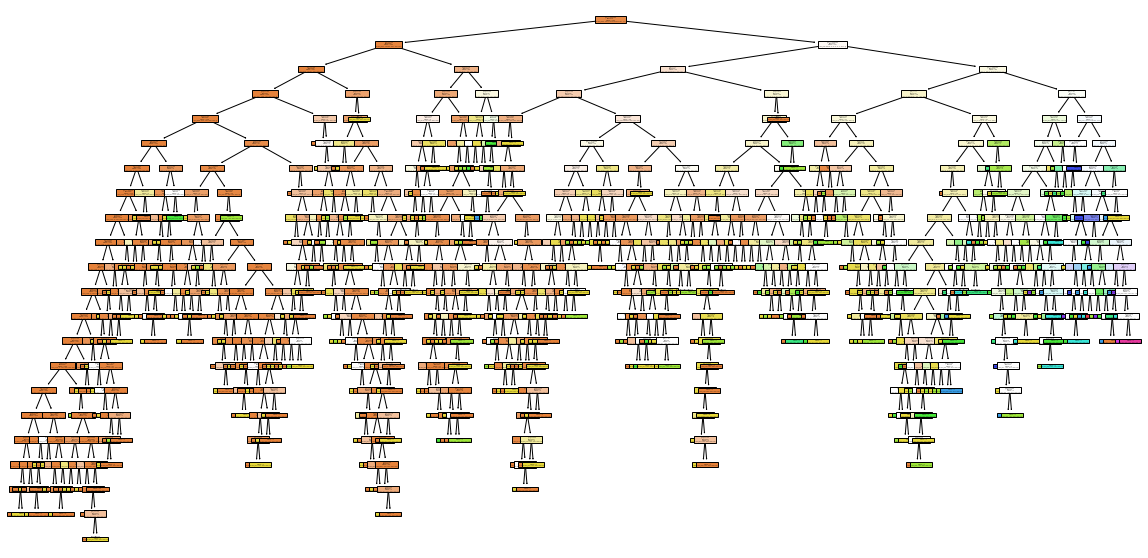

In [153]:
y_pred_w_fr = tree_model.predict(Xw_test_fr)
accuracy = accuracy_score(yw_test_fr, y_pred_w_fr)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True)
plt.show()

In [154]:
# With the wage

In [155]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(Xv_train_not_fr, yv_train_not_fr)

DecisionTreeClassifier(random_state=42)

In [156]:
tree_model.score(Xv_test_not_fr, yv_test_not_fr)

0.9837883959044369

0.9844559585492227


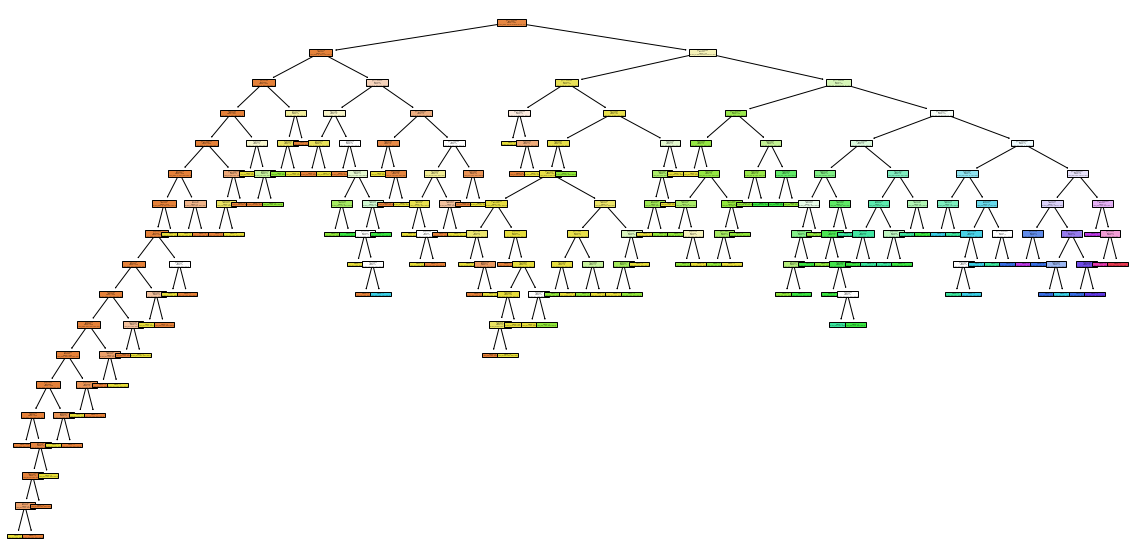

In [157]:
y_pred_v_fr = tree_model.predict(Xv_test_fr)
accuracy = accuracy_score(yv_test_fr, y_pred_v_fr)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True)
plt.show()

### Interpretation : ...

In [158]:
# The same must be done with the wage.

In [159]:
tree_modelw = DecisionTreeClassifier(random_state=42)
tree_modelw.fit(Xw_train_not_fr, yw_train_not_fr)

DecisionTreeClassifier(random_state=42)

0.9328782707622298


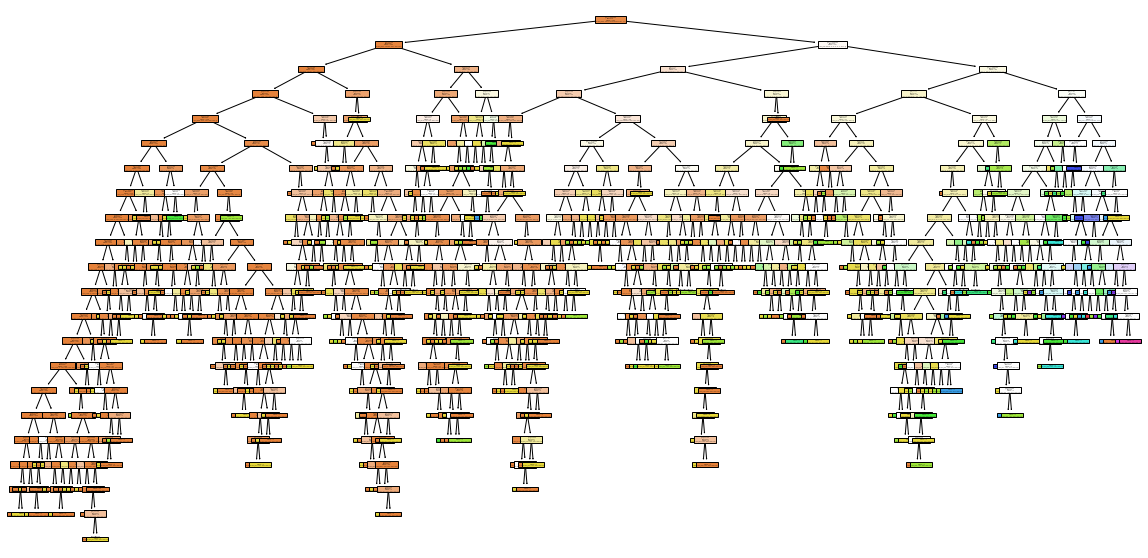

In [160]:
y_pred_w_not_fr = tree_modelw.predict(Xw_test_not_fr)
accuracy = accuracy_score(yw_test_not_fr, y_pred_w_not_fr)
print(accuracy)
plt.figure(figsize=(20,10))
plot_tree(tree_modelw, filled=True)
plt.show()

In [161]:
print(export_text(tree_modelw))

|--- feature_4 <= 11850000.00
|   |--- feature_57 <= 73.50
|   |   |--- feature_65 <= 73.50
|   |   |   |--- feature_50 <= 78.50
|   |   |   |   |--- feature_60 <= 70.50
|   |   |   |   |   |--- feature_51 <= 72.50
|   |   |   |   |   |   |--- feature_3 <= 433.50
|   |   |   |   |   |   |   |--- feature_4 <= 8450000.00
|   |   |   |   |   |   |   |   |--- feature_49 <= 73.50
|   |   |   |   |   |   |   |   |   |--- feature_37 <= 90.50
|   |   |   |   |   |   |   |   |   |   |--- feature_59 <= 72.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_59 >  72.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_37 >  90.50
|   |   |   |   |   |   |   |   |   |   |--- feature_30 <= 65.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_30 >  65.00
|   |   |   |   |   |   |  

In [162]:
print(Xw_test_not_fr.columns[[4,8, 57, 65, 50, 60]])

Index(['Release Clause', 'International Reputation', 'CAM Rating', 'CB Rating',
       'Goalkeeper Reflexes', 'RM Rating'],
      dtype='object')


The most discriminating attributes for a decision tree are the ones at the top. The first feature is the release clause, which we determined earlier was an important feature.
After that 

## Predicting score : 

In [163]:
from sklearn.metrics import r2_score


In [164]:
X = df_encoded.drop(columns=['Nationality', "Overall" , 'Full Name'])
y = df_encoded["Overall"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [165]:
lin_reg = LinearRegression().fit(X_train , y_train)

In [166]:
y_pred = lin_reg.predict(X_test)


In [167]:
y_pred = np.rint(y_pred) 
y_pred = y_pred.astype(int)



In [168]:
r2_score(y_test , y_pred)

0.9455108401291371

In [169]:
lin_reg.coef_

array([ 2.81761829e-01,  2.79838856e-07,  1.58217003e+00, -2.78898630e-02,
        7.68008686e-02,  4.66530345e-05, -1.04849455e-08,  1.88037386e-02,
       -4.21420766e-02,  4.72227634e-01, -4.68098619e-01, -1.96424613e-01,
       -1.26015206e-01, -5.98783133e-03, -5.29437518e-03,  8.82635561e-03,
        1.07263245e-01, -4.45791349e-02,  1.65726095e-02, -1.46524002e-02,
       -1.41136759e-02,  5.31081775e-02, -1.47764803e-02,  2.14160126e-02,
       -8.01472150e-02,  1.22673692e-02,  2.99143678e-02, -2.76421472e-02,
       -5.58699755e-03, -1.42360323e-02, -2.31447468e-02,  1.00281828e-02,
        9.15155772e-02,  1.41854795e-02,  6.84006852e-04,  2.38608546e-02,
       -1.40997874e-02,  1.03605457e-02, -2.31747987e-03,  9.58491300e-03,
       -5.57381498e-02, -4.31177391e-02, -3.05091582e-02,  2.81492555e-02,
        3.77720490e-02,  9.80213426e-03, -1.81005618e-02, -2.49278309e-02,
        1.06082494e-02,  2.20336197e-03,  1.53470230e-02,  1.15960469e-02,
        5.88981572e-04,  

In [170]:
# tree regressor 
tree_reg = DecisionTreeRegressor().fit(X_train , y_train)
tree_reg.score(X_test , y_test)


0.9865000034171488

[Text(0.5, 0.875, 'Reactions <= 63.5\nsquared_error = 46.297\nsamples = 14831\nvalue = 65.851'),
 Text(0.25, 0.625, 'Value(in Euro) <= 562500.0\nsquared_error = 23.464\nsamples = 8675\nvalue = 61.84'),
 Text(0.125, 0.375, 'Age <= 1.5\nsquared_error = 18.161\nsamples = 4081\nvalue = 58.363'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Value(in Euro) <= 1150000.0\nsquared_error = 7.89\nsamples = 4594\nvalue = 64.929'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Value(in Euro) <= 4450000.0\nsquared_error = 23.866\nsamples = 6156\nvalue = 71.503'),
 Text(0.625, 0.375, 'Potential <= 69.5\nsquared_error = 10.23\nsamples = 4469\nvalue = 69.286'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Value(in Euro) <= 17250000.0\nsquared_error = 12.472\nsamples = 1687\nvalue = 77.376'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0

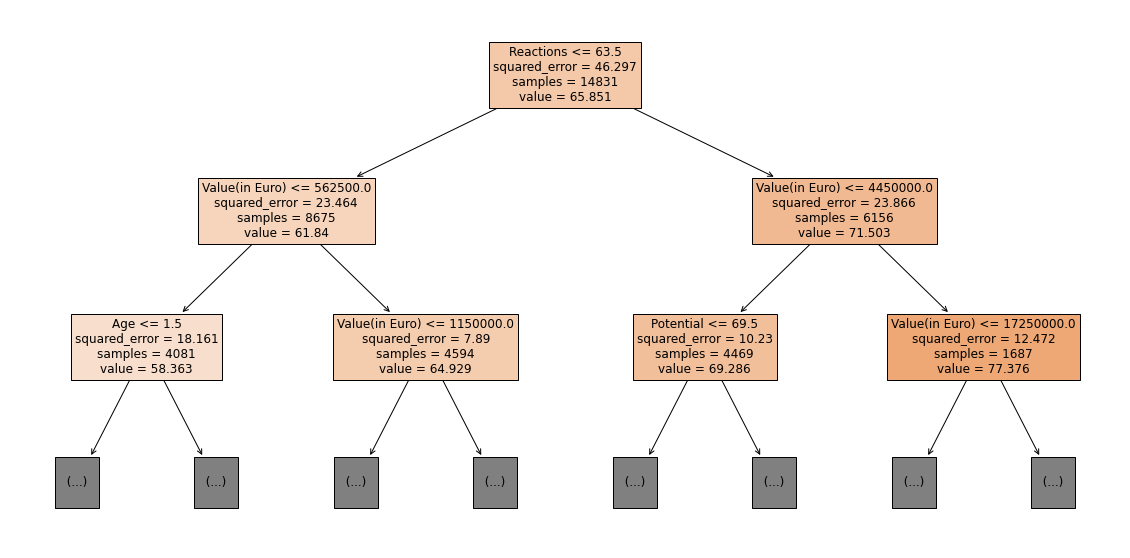

In [171]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg, filled=True , fontsize=12 , max_depth=2 , feature_names=X_train.columns)


In [172]:
# get the features are never used in the tree
print(export_text(tree_reg , feature_names=list(X_train.columns)))

|--- Reactions <= 63.50
|   |--- Value(in Euro) <= 562500.00
|   |   |--- Age <= 1.50
|   |   |   |--- Value(in Euro) <= 287500.00
|   |   |   |   |--- Value(in Euro) <= 165000.00
|   |   |   |   |   |--- Value(in Euro) <= 30000.00
|   |   |   |   |   |   |--- BaseStats <= 337.00
|   |   |   |   |   |   |   |--- Balance <= 53.50
|   |   |   |   |   |   |   |   |---  GoalkeeperKicking <= 34.50
|   |   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |   |---  GoalkeeperKicking >  34.50
|   |   |   |   |   |   |   |   |   |--- value: [58.00]
|   |   |   |   |   |   |   |--- Balance >  53.50
|   |   |   |   |   |   |   |   |--- Penalties <= 40.50
|   |   |   |   |   |   |   |   |   |--- value: [60.00]
|   |   |   |   |   |   |   |   |--- Penalties >  40.50
|   |   |   |   |   |   |   |   |   |--- Curve <= 54.00
|   |   |   |   |   |   |   |   |   |   |--- value: [61.00]
|   |   |   |   |   |   |   |   |   |--- Curve >  54.00
|   |   |   |   |   |   |   |   |   |

In [173]:
X_not_fr = df_encoded.drop(columns=["DWage", "DValue", 'Full Name', 'Overall', 'Wage(in Euro)', 'Value(in Euro)'])
X_not_fr = X_not_fr[X_not_fr["Nationality"] != "France"]
X_not_fr.index



Index([    0,     2,     3,     5,     6,     7,     8,     9,    10,    11,
       ...
       18529, 18530, 18531, 18532, 18533, 18534, 18535, 18536, 18537, 18538],
      dtype='int64', length=17576)

In [174]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)